<a href="https://colab.research.google.com/github/shakil642/Predictive-Modeling-of-Financial-Loss-and-Recovery-Time-for-Global-Cybersecurity-Threats/blob/main/Predictive_Modeling_of_Financial_Loss_and_Recovery_Time_for_Global_Cybersecurity_Threats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Global_Cybersecurity_Threats_2015-2024.csv')

[This is my dataset download link,](https://drive.google.com/file/d/1yoIHhJjG2sodu-SD_oCgQiVWh6_kzvjT/view?usp=sharing)

In [ ]:
df.sample(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2366,UK,2022,Man-in-the-Middle,IT,66.25,303838,Nation-state,Zero-day,AI-based Detection,56
2014,Brazil,2021,Phishing,Government,42.82,974362,Insider,Unpatched Software,Encryption,70
2601,Germany,2016,SQL Injection,Education,61.78,387500,Nation-state,Weak Passwords,AI-based Detection,30
69,China,2021,Phishing,Healthcare,55.04,871600,Insider,Unpatched Software,Firewall,29
2440,USA,2020,DDoS,Banking,60.20,998937,Nation-state,Zero-day,Antivirus,19


In [ ]:
df.shape

(3000, 10)

In [ ]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


In [ ]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000

In [ ]:
print("\nDataFrame info:")
df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [ ]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [ ]:
print("\nNumber of unique values per column:")
print(df.nunique())


Number of unique values per column:
Country                                  10
Year                                     10
Attack Type                               6
Target Industry                           7
Financial Loss (in Million $)          2536
Number of Affected Users               2998
Attack Source                             4
Security Vulnerability Type               4
Defense Mechanism Used                    5
Incident Resolution Time (in Hours)      72
dtype: int64


In [ ]:
if 'Attack Type' in df.columns:
  print("\nValue counts for 'Attack Type':")
  print(df['Attack Type'].value_counts())


Value counts for 'Attack Type':
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


In [ ]:
loss_per_industry = (
    df
    .groupby('Target Industry')['Financial Loss (in Million $)']
    .sum()
    .sort_values(ascending=False)
)

print("Total financial loss by industry (top 5):")
print(loss_per_industry.head(5))

top_industry = loss_per_industry.idxmax()
top_loss_value = loss_per_industry.max()
print(f"\nIndustry with highest total loss: {top_industry} (${top_loss_value:.2f} Million)")


Total financial loss by industry (top 5):
Target Industry
IT            24809.83
Banking       22772.39
Government    21205.33
Retail        21119.55
Healthcare    21041.29
Name: Financial Loss (in Million $), dtype: float64

Industry with highest total loss: IT ($24809.83 Million)


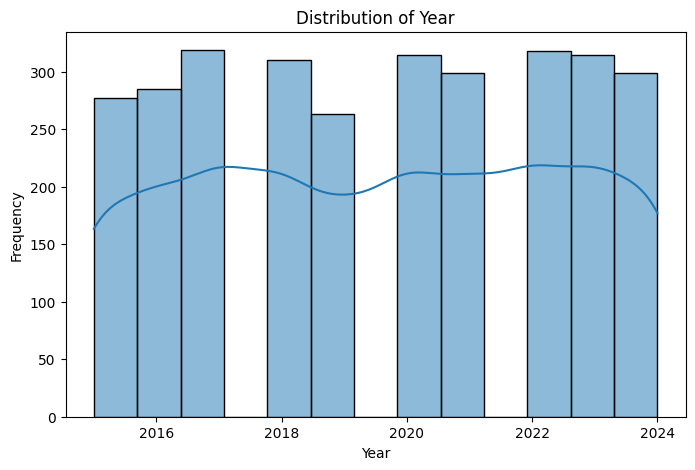

In [ ]:
if 'Year' in df.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df['Year'], kde=True)
  plt.title('Distribution of Year')
  plt.xlabel('Year')
  plt.ylabel('Frequency')
  plt.show()

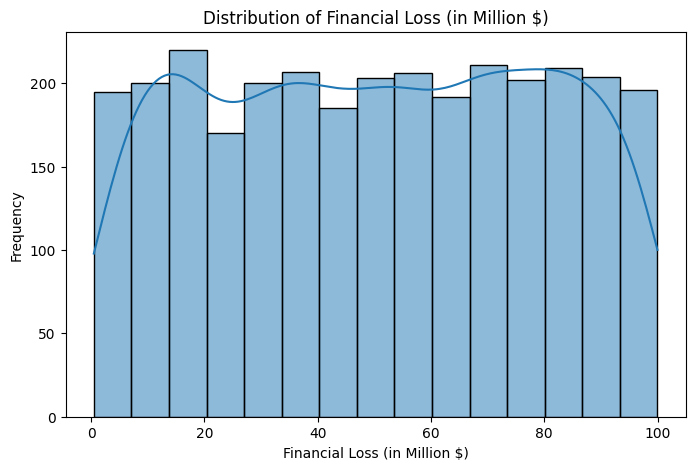

In [ ]:
if 'Financial Loss (in Million $)' in df.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df['Financial Loss (in Million $)'], kde=True)
  plt.title('Distribution of Financial Loss (in Million $)')
  plt.xlabel('Financial Loss (in Million $)')
  plt.ylabel('Frequency')
  plt.show()

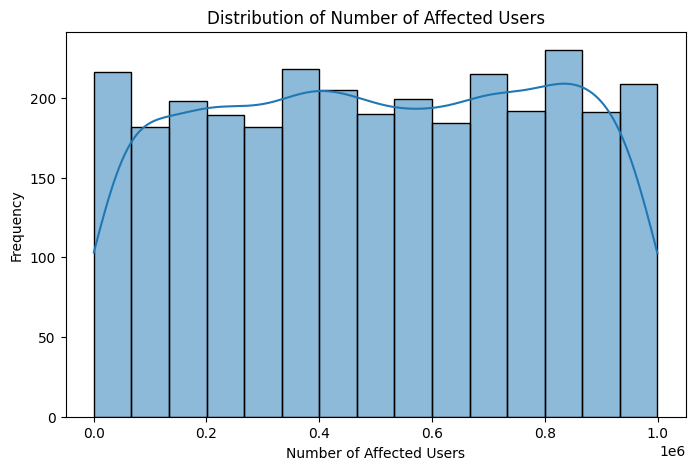

In [ ]:
if 'Number of Affected Users' in df.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df['Number of Affected Users'], kde=True)
  plt.title('Distribution of Number of Affected Users')
  plt.xlabel('Number of Affected Users')
  plt.ylabel('Frequency')
  plt.show()

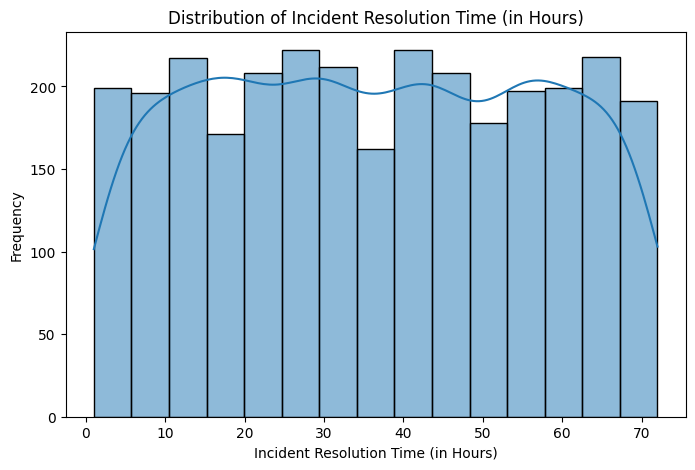

In [ ]:
if 'Incident Resolution Time (in Hours)' in df.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df['Incident Resolution Time (in Hours)'], kde=True)
  plt.title('Distribution of Incident Resolution Time (in Hours)')
  plt.xlabel('Incident Resolution Time (in Hours)')
  plt.ylabel('Frequency')
  plt.show()

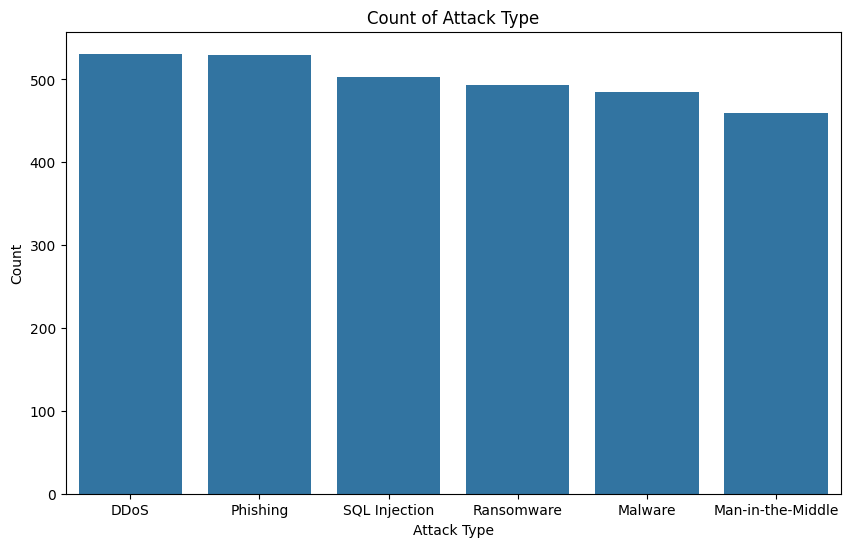

In [ ]:
if 'Attack Type' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Attack Type', data=df, order=df['Attack Type'].value_counts().index)
  plt.title('Count of Attack Type')
  plt.ylabel('Count')
  plt.xlabel('Attack Type')
  plt.show()

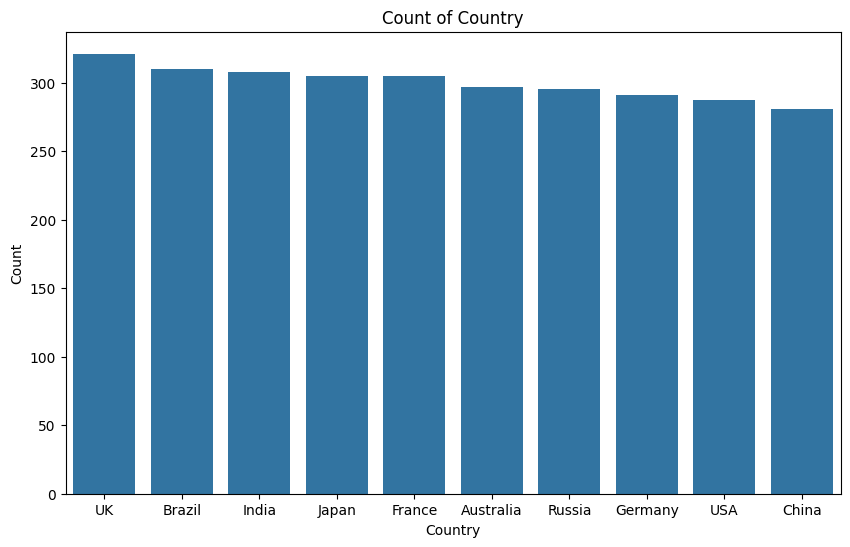

In [ ]:
if 'Country' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
  plt.title('Count of Country')
  plt.xlabel('Country')
  plt.ylabel('Count')
  plt.show()

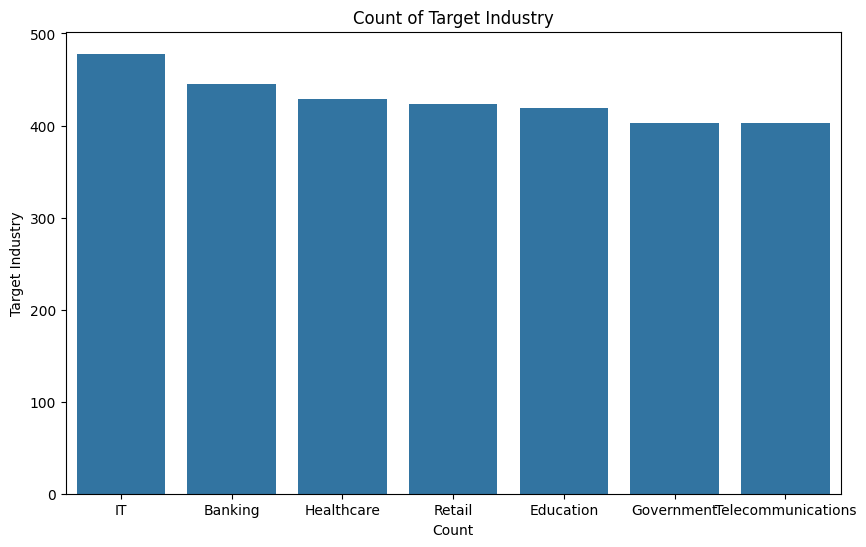

In [ ]:
if 'Target Industry' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Target Industry', data=df, order=df['Target Industry'].value_counts().index)
  plt.title('Count of Target Industry')
  plt.ylabel('Target Industry')
  plt.xlabel('Count')
  plt.show()

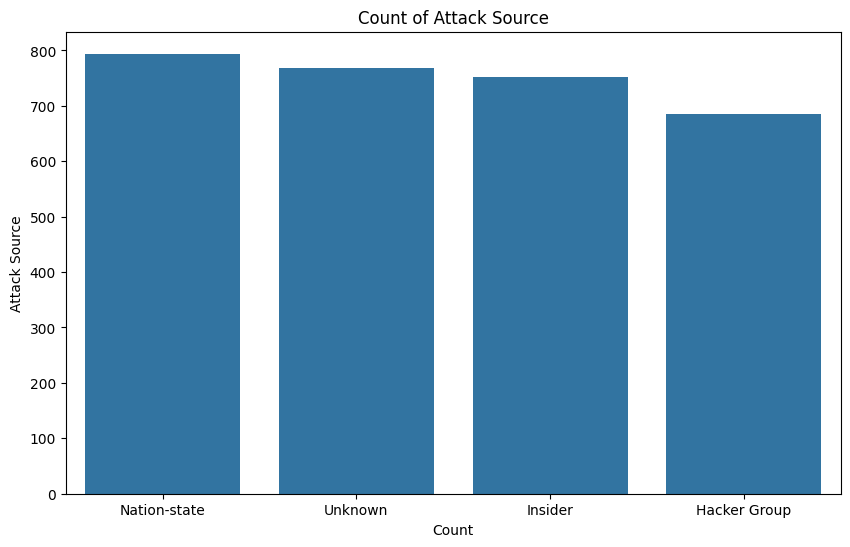

In [ ]:
if 'Attack Source' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Attack Source', data=df, order=df['Attack Source'].value_counts().index)
  plt.title('Count of Attack Source')
  plt.ylabel('Attack Source')
  plt.xlabel('Count')
  plt.show()

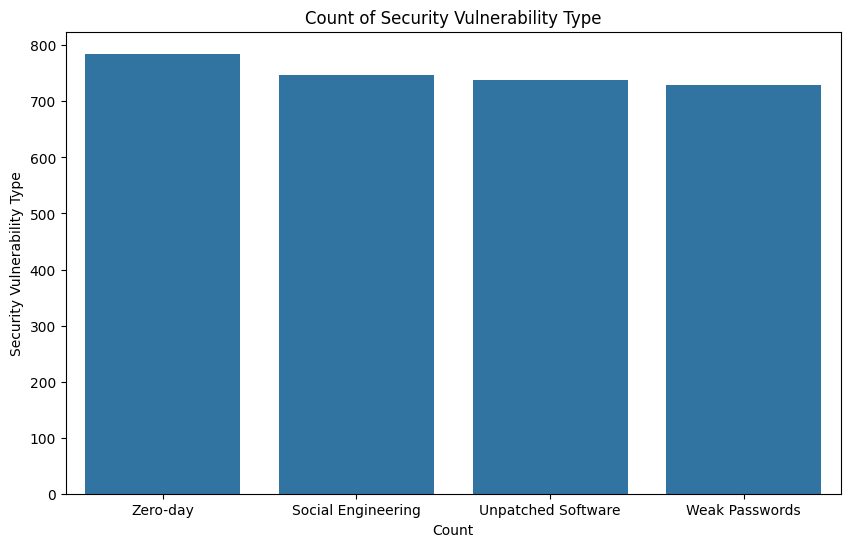

In [ ]:
if 'Security Vulnerability Type' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Security Vulnerability Type', data=df, order=df['Security Vulnerability Type'].value_counts().index)
  plt.title('Count of Security Vulnerability Type')
  plt.ylabel('Security Vulnerability Type')
  plt.xlabel('Count')
  plt.show()

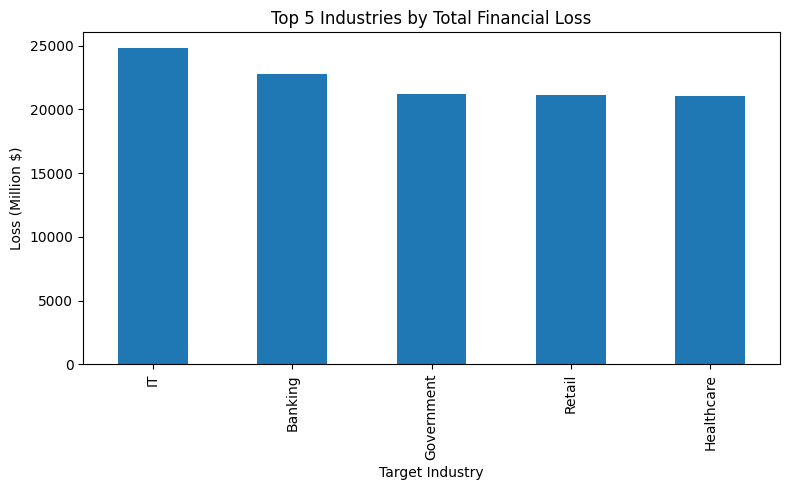

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
loss_per_industry.head(5).plot(kind='bar')
plt.title('Top 5 Industries by Total Financial Loss')
plt.ylabel('Loss (Million $)')
plt.xlabel('Target Industry')
plt.tight_layout()
plt.show()

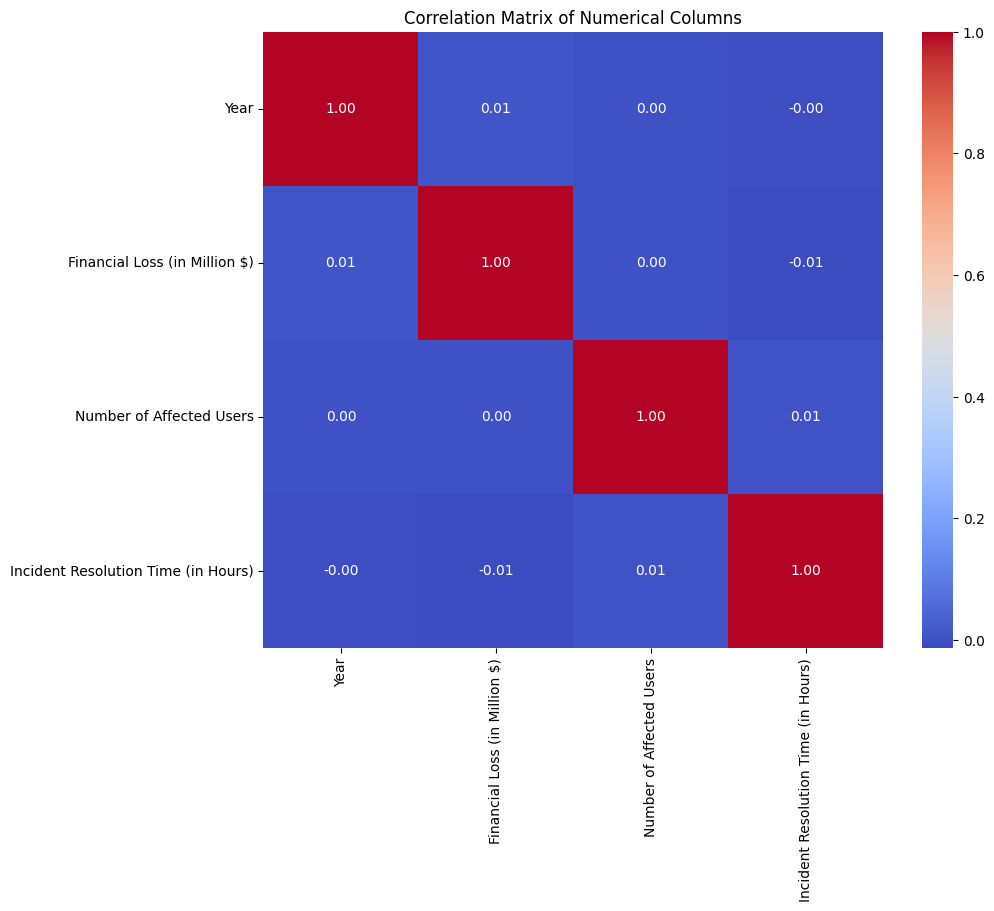

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
if not numerical_df.empty:
  plt.figure(figsize=(10, 8))
  sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Numerical Columns')
  plt.show()

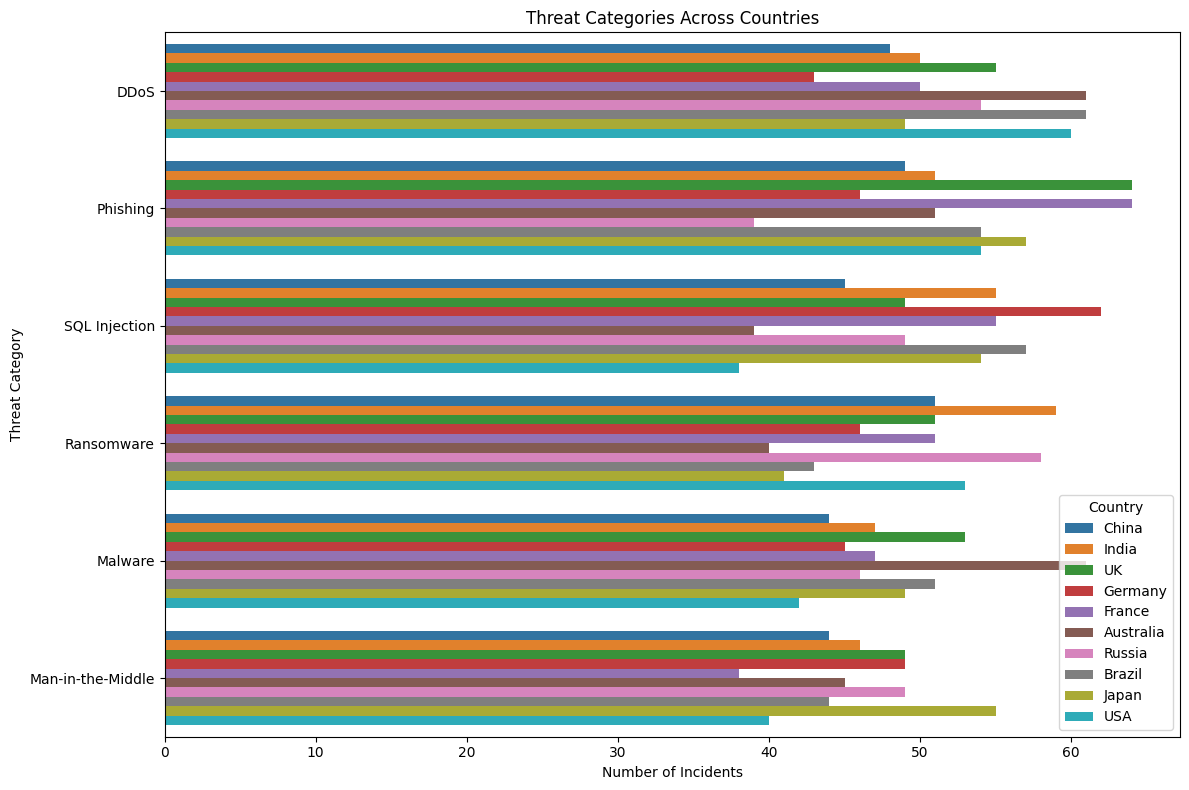

In [ ]:
if 'Country' in df.columns and 'Attack Type' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, y='Attack Type', hue='Country', order=df['Attack Type'].value_counts().index)
    plt.title('Threat Categories Across Countries')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Threat Category')
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()
elif 'Country' not in df.columns:
    print("\n'Country' column not found in the dataset.")
elif 'Attack Type' not in df.columns:
    print("\n'Attack Type' column not found in the dataset.")

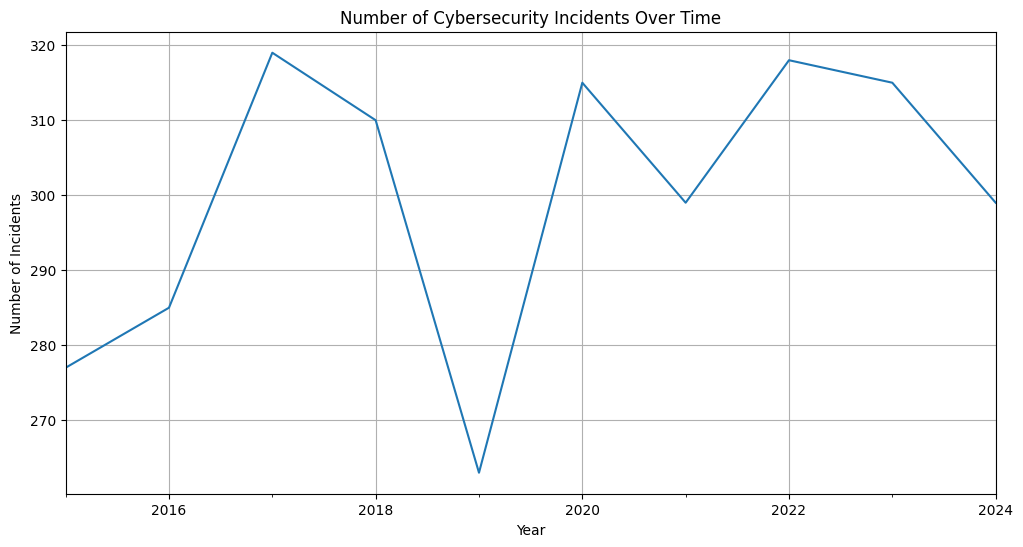

In [ ]:
if 'Year' in df.columns:

    df['Year'] = pd.to_datetime(df['Year'], format='%Y')

    df_ts = df.set_index('Year')

    incidents_over_time = df_ts.resample('Y').size()

    plt.figure(figsize=(12, 6))
    incidents_over_time.plot()
    plt.title('Number of Cybersecurity Incidents Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.grid(True)
    plt.show()

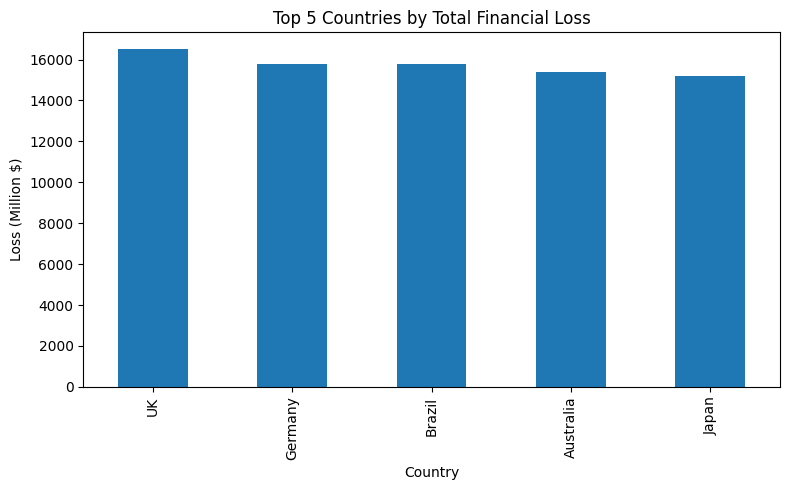

In [ ]:
import matplotlib.pyplot as plt

loss_per_country = (
    df
    .groupby('Country')['Financial Loss (in Million $)']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
loss_per_country.head(5).plot(kind='bar')
plt.title('Top 5 Countries by Total Financial Loss')
plt.ylabel('Loss (Million $)')
plt.tight_layout()
plt.show()

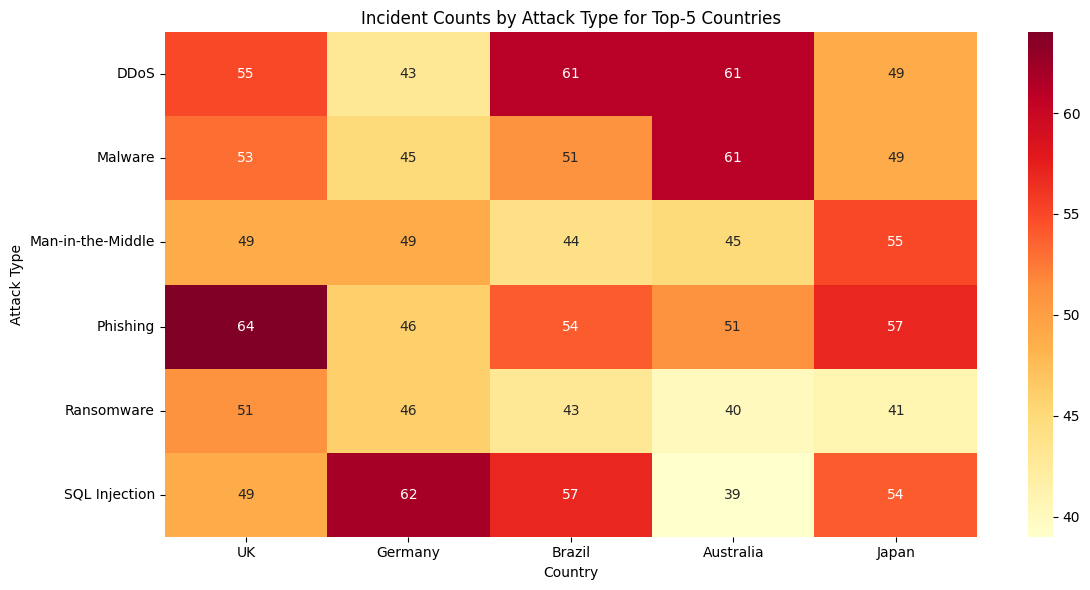

In [ ]:
import seaborn as sns

loss_per_country = (
    df
    .groupby('Country')['Financial Loss (in Million $)']
    .sum()
    .sort_values(ascending=False)
)

pivot = (
    df
    .groupby(['Attack Type', 'Country'])
    .size()
    .unstack(fill_value=0)
)

top5_countries = loss_per_country.head(5).index
pivot_top5 = pivot[top5_countries]

plt.figure(figsize=(12,6))
sns.heatmap(pivot_top5, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Incident Counts by Attack Type for Top‑5 Countries')
plt.ylabel('Attack Type')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


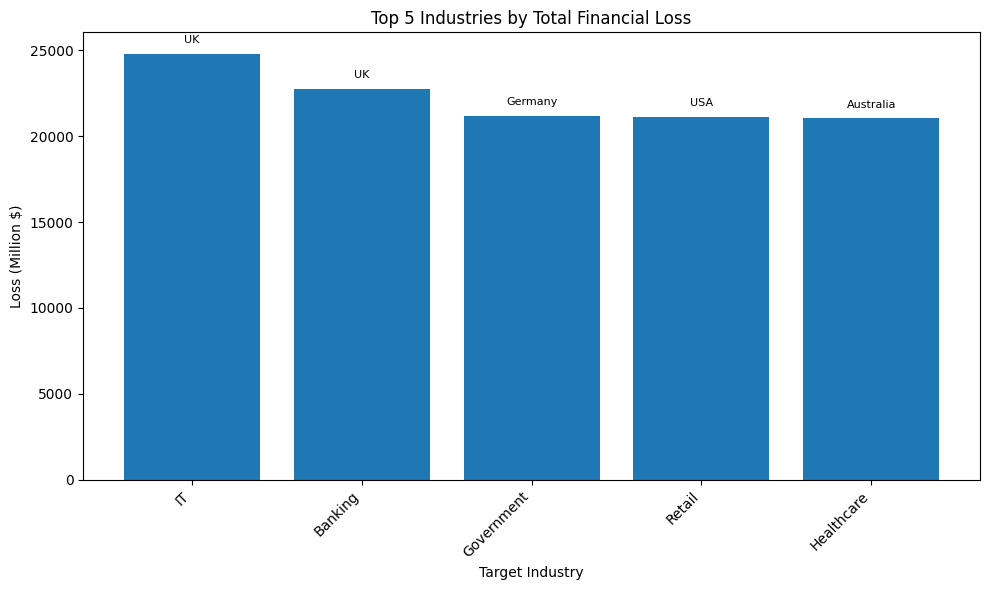

In [ ]:
import matplotlib.pyplot as plt

loss_per_industry = (
    df
    .groupby('Target Industry')['Financial Loss (in Million $)']
    .sum()
    .sort_values(ascending=False)
)

top5_ind = loss_per_industry.head(5)

top_countries = {}
for industry in top5_ind.index:
    by_country = (
        df[df['Target Industry']==industry]
        .groupby('Country')['Financial Loss (in Million $)']
        .sum()
    )
    top_countries[industry] = by_country.idxmax()

plt.figure(figsize=(10,6))
bars = plt.bar(top5_ind.index, top5_ind.values)

plt.title('Top 5 Industries by Total Financial Loss')
plt.ylabel('Loss (Million $)')
plt.xlabel('Target Industry')
plt.xticks(rotation=45, ha='right')

for bar, industry in zip(bars, top5_ind.index):
    height = bar.get_height()
    country = top_countries[industry]
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02*top5_ind.max(),
        country,
        ha='center',
        va='bottom',
        fontsize= 8,
    )

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

warnings.filterwarnings('ignore')

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

print("\n--- Vulnerability Analysis for IT Industry ---")

df_it_global = df[df['Target Industry'] == 'IT']

global_analysis = df_it_global.groupby('Attack Type').agg(
    Attack_Frequency=('Attack Type', 'count'),
    Total_Financial_Loss_Millions=('Financial Loss (in Million $)', 'sum'),
    Average_Resolution_Time_Hours=('Incident Resolution Time (in Hours)', 'mean')
).sort_values(by='Attack_Frequency', ascending=False)


print("\n Top Attack Types on IT (Global)")
print(global_analysis.head())

df_it_uk = df[(df['Target Industry'] == 'IT') & (df['Country'] == 'UK')]

uk_analysis = df_it_uk.groupby('Attack Type').agg(
    Attack_Frequency=('Attack Type', 'count'),
    Total_Financial_Loss_Millions=('Financial Loss (in Million $)', 'sum'),
    Average_Resolution_Time_Hours=('Incident Resolution Time (in Hours)', 'mean')
).sort_values(by='Attack_Frequency', ascending=False)

print("\n--- Top Attack Types on IT Industry in UK ---")
print(uk_analysis.head())

print("\n---Building Predictive Models on Global Data ---")

base_features = [
    'Year',
    'Attack Type',
    'Target Industry',
    'Attack Source',
    'Number of Affected Users',
]

cost_model_features = base_features + ['Incident Resolution Time (in Hours)']

time_model_features = base_features + ['Financial Loss (in Million $)']

df['Year'] = df['Year'].dt.year

categorical_features = ['Attack Type', 'Target Industry', 'Attack Source']
all_numerical_features = ['Year', 'Number of Affected Users', 'Incident Resolution Time (in Hours)', 'Financial Loss (in Million $)']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), [col for col in all_numerical_features if col in cost_model_features and col in time_model_features])
    ],
    remainder='passthrough'
)


--- Vulnerability Analysis for IT Industry ---

 Top Attack Types on IT (Global)
                   Attack_Frequency  Total_Financial_Loss_Millions  \
Attack Type                                                          
DDoS                             91                        4718.88   
Phishing                         89                        4362.49   
Man-in-the-Middle                80                        4421.12   
SQL Injection                    77                        3993.58   
Ransomware                       74                        3902.29   

                   Average_Resolution_Time_Hours  
Attack Type                                       
DDoS                                   36.120879  
Phishing                               37.640449  
Man-in-the-Middle                      34.675000  
SQL Injection                          34.103896  
Ransomware                             36.256757  

--- Top Attack Types on IT Industry in UK ---
                   Atta

In [ ]:
models_to_compare = {
    "Polynomial Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', LinearRegression())
    ]),
    "RandomForest": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "XGBoost": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False)),
        ('model', XGBRegressor(n_estimators=100, random_state=42))
    ]),
}

In [ ]:
print("\n--- ⏱️ Training & Comparing Models for Incident TIME Prediction ---")
X_time = df[time_model_features]
y_time = df['Incident Resolution Time (in Hours)']
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

time_results = []

for name, pipeline in models_to_compare.items():
    pipeline.fit(X_train_time, y_train_time)

    y_pred = pipeline.predict(X_test_time)
    r2 = r2_score(y_test_time, y_pred)
    mae = mean_absolute_error(y_test_time, y_pred)

    time_results.append({'Model': name, 'R² Score': r2, 'MAE (Hours)': mae})
    print(f"  {name} model trained.")


--- ⏱️ Training & Comparing Models for Incident TIME Prediction ---
  Polynomial Regression model trained.
  RandomForest model trained.
  XGBoost model trained.


In [ ]:
print("\n--- 💰 Training & Comparing Models for Financial Loss Prediction ---")
X_cost = df[cost_model_features]
y_cost = df['Financial Loss (in Million $)']
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)

cost_results = []

for name, pipeline in models_to_compare.items():
    pipeline.fit(X_train_cost, y_train_cost)

    y_pred = pipeline.predict(X_test_cost)
    r2 = r2_score(y_test_cost, y_pred)
    mae = mean_absolute_error(y_test_cost, y_pred)

    cost_results.append({'Model': name, 'R² Score': r2, 'MAE (Million $)': mae})
    print(f"  {name} model trained.")


--- 💰 Training & Comparing Models for Financial Loss Prediction ---
  Polynomial Regression model trained.
  RandomForest model trained.
  XGBoost model trained.


In [ ]:
print("\n" + "="*50)
print("              MODEL PERFORMANCE RESULTS")
print("="*50)

print("\n💰 Financial Loss Model Comparison:")
cost_results_df = pd.DataFrame(cost_results).sort_values(by='R² Score', ascending=False)
print(cost_results_df.to_string(index=False))
best_cost_model_name = cost_results_df.iloc[0]['Model']
print(f"\nBest model for Cost prediction is: '{best_cost_model_name}' (R²: {cost_results_df.iloc[0]['R² Score']:.2f}, MAE: {cost_results_df.iloc[0]['MAE (Million $)']:.2f} Million $)")

print("\n⏱️ Incident Time Model Comparison:")
time_results_df = pd.DataFrame(time_results).sort_values(by='R² Score', ascending=False)
print(time_results_df.to_string(index=False))
best_time_model_name = time_results_df.iloc[0]['Model']
print(f"\nBest model for Time prediction is: '{best_time_model_name}' (R²: {time_results_df.iloc[0]['R² Score']:.2f}, MAE: {time_results_df.iloc[0]['MAE (Hours)']:.2f} Hours)")


              MODEL PERFORMANCE RESULTS

💰 Financial Loss Model Comparison:
                Model  R² Score  MAE (Million $)
Polynomial Regression -0.068262        25.267342
         RandomForest -0.083109        25.258792
              XGBoost -0.341331        27.555489

Best model for Cost prediction is: 'Polynomial Regression' (R²: -0.07, MAE: 25.27 Million $)

⏱️ Incident Time Model Comparison:
                Model  R² Score  MAE (Hours)
         RandomForest -0.057701    18.293000
Polynomial Regression -0.079913    18.470453
              XGBoost -0.260237    19.566444

Best model for Time prediction is: 'RandomForest' (R²: -0.06, MAE: 18.29 Hours)


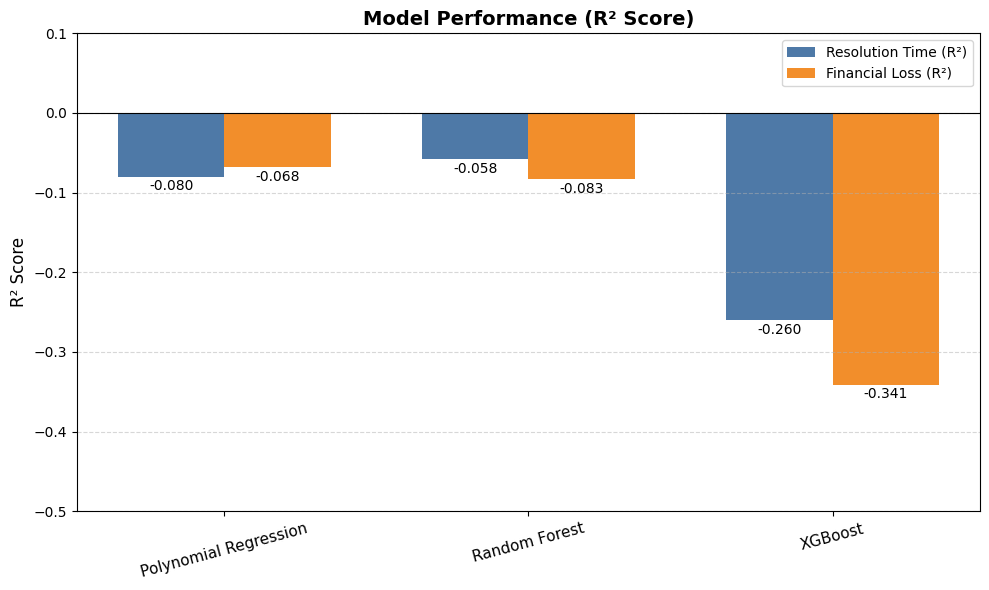

In [ ]:
models = ['Polynomial Regression', 'Random Forest', 'XGBoost']
r2_resolution_time = [-0.080, -0.058, -0.260]
r2_financial_loss = [-0.068, -0.083, -0.341]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, r2_resolution_time, width, label='Resolution Time (R²)', color='#4e79a7')
bars2 = ax.bar(x + width/2, r2_financial_loss, width, label='Financial Loss (R²)', color='#f28e2b')

ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('Model Performance (R² Score)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, fontsize=11)
ax.legend()
ax.axhline(0, color='black', linewidth=0.8)
ax.set_ylim(-0.5, 0.1)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -12 if height < 0 else 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import pickle
import pandas as pd

trained_cost_pipelines = {}
trained_time_pipelines = {}

print("--- 💰 Training all Financial Loss models ---")
for name, pipeline in models_to_compare.items():
    pipeline.fit(X_train_cost, y_train_cost)

    trained_cost_pipelines[name] = pipeline
    print(f"  {name} cost model trained.")

print("\n--- ⏱️ Training all Incident Time models ---")
for name, pipeline in models_to_compare.items():
    pipeline.fit(X_train_time, y_train_time)

    trained_time_pipelines[name] = pipeline
    print(f"  {name} time model trained.")

print("\n All models have been trained and stored for both tasks.")

--- 💰 Training all Financial Loss models ---
  Polynomial Regression cost model trained.
  RandomForest cost model trained.
  XGBoost cost model trained.

--- ⏱️ Training all Incident Time models ---
  Polynomial Regression time model trained.
  RandomForest time model trained.
  XGBoost time model trained.

 All models have been trained and stored for both tasks.


In [ ]:
best_time_model_name = time_results_df.iloc[0]['Model']
best_time_pipeline = trained_time_pipelines[best_time_model_name]
print(f"Best model for Incident Time prediction is: '{best_time_model_name}'")

best_cost_model_name = cost_results_df.iloc[0]['Model']
best_cost_pipeline = trained_cost_pipelines[best_cost_model_name]
print(f"Best model for Finacial Loss prediction is: '{best_cost_model_name}'")

Best model for Incident Time prediction is: 'RandomForest'
Best model for Finacial Loss prediction is: 'Polynomial Regression'


In [ ]:
time_model_filename = '/content/best_time_model.pkl'
with open(time_model_filename, 'wb') as file:
    pickle.dump(best_time_pipeline, file)
print(f"-> Incident Time model saved to {time_model_filename}")

cost_model_filename = '/content/best_cost_model.pkl'
with open(cost_model_filename, 'wb') as file:
    pickle.dump(best_cost_pipeline, file)
print(f"-> Fincial Loss model saved to {cost_model_filename}")

-> Incident Time model saved to /content/best_time_model.pkl
-> Fincial Loss model saved to /content/best_cost_model.pkl


In [ ]:
time_model_filename = '/content/best_time_model.pkl'
cost_model_filename = '/content/best_cost_model.pkl'

with open(time_model_filename, 'rb') as file:
    loaded_time_model = pickle.load(file)

with open(cost_model_filename, 'rb') as file:
    loaded_cost_model = pickle.load(file)

print("Best models for Fincial Loss and Incident Time have been loaded.")

Best models for Fincial Loss and Incident Time have been loaded.


In [ ]:
sample_attack_uk = pd.DataFrame({
    'Year': [2025],
    'Attack Type': ['Phishing'],
    'Target Industry': ['IT'],
    'Attack Source': ['External'],
    'Number of Affected Users': [75000],
    'Incident Resolution Time (in Hours)': [0],
    'Financial Loss (in Million $)': [100]
})


print("\n--- Future prediction on Phishing Attack on IT Industry in UK, 2025 ---")

print(f"\nPredicted resolved time against Phishing attack on IT industry in UK, 2025:")
print(f"================================================================================")
predicted_time_uk = loaded_time_model.predict(sample_attack_uk)
print(f"Predicted Incident Resolution Time: {predicted_time_uk[0]:.2f} Hours")

print(f"\n")

sample_attack_for_cost = sample_attack_uk.copy()

sample_attack_for_cost['Incident Resolution Time (in Hours)'] = predicted_time_uk[0]

print(f"Predicted financial loss against Phishing attack on IT industry in UK, 2025:")
print(f"===============================================================================")
predicted_loss_uk = loaded_cost_model.predict(sample_attack_for_cost)
print(f"Predicted Financial Loss: ${predicted_loss_uk[0]:.2f} Million")


--- Future prediction on Phishing Attack on IT Industry in UK, 2025 ---

Predicted resolved time against Phishing attack on IT industry in UK, 2025:
Predicted Incident Resolution Time: 35.89 Hours


Predicted financial loss against Phishing attack on IT industry in UK, 2025:
Predicted Financial Loss: $42.12 Million
